In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from pipeline import *

In [25]:
path = './data/*/*1/*.jpeg'

In [31]:
p = VehicleDetectionPipeline()

In [34]:
p.preprocess_data(path=path)

preprocess_data
extract_image_paths
extract_features_for_images
extract_features_for_images
scale_feature_vectors


In [38]:
p.train()

train
Test Accuracy of SVC =  0.96875


In [39]:
ip

In [55]:
ip = ImageProcessor('./data/test_image.jpg')

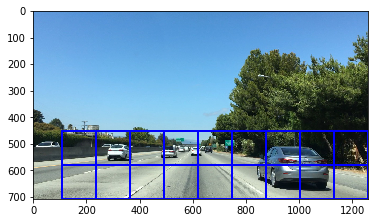

In [56]:
ip.find_vehicles()